In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [10]:
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2016.csv", thousands=",",)
gpd_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=",",
                             delimiter="\t", encoding="latin1", 
                             na_values="n/a")

In [11]:
# Prepare the data
oecd_bli = oecd_bli[(oecd_bli['INEQUALITY'] == 'TOT') & (oecd_bli['Indicator'] == 'Life satisfaction')]
oecd_bli = oecd_bli[['Country', 'Value']]
gpd_per_capita = gpd_per_capita[['Country', '2015']]
country_stats = pd.merge(oecd_bli, gpd_per_capita, on='Country', how='inner')

# Renaming columns
country_stats.rename(columns={'2015': 'GDP per capita', 'Value':'Life satisfaction'}, inplace=True)
country_stats

x = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

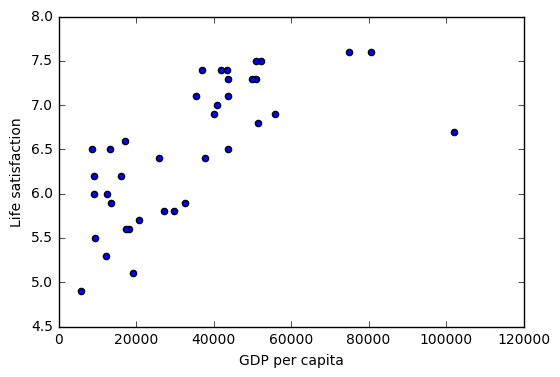

In [12]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [13]:
# Select a linear model
lin_reg_model = LinearRegression()

# Train the model
lin_reg_model.fit(x, y)

# Make a prediction for Cyprus

X_new = [[22587]]
print(lin_reg_model.predict(X_new))

[[ 6.2228105]]


In [16]:
# Attempt with K Nearest Neighbors
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(x,y)
print(clf.predict(X_new))

[[ 5.73333333]]
